#To predict if a person's loan will accepted or not

#data load

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
pwd

'/content/drive/MyDrive'

#data import

In [6]:
import pandas as pd
df = pd.read_csv('UniversalBank.csv')

#data preparation

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isna().sum()
#df.isnull().sum()

In [10]:
df.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
#dropped ZIP code & ID column
df1 = df.drop(columns=['ZIP Code', 'ID'])

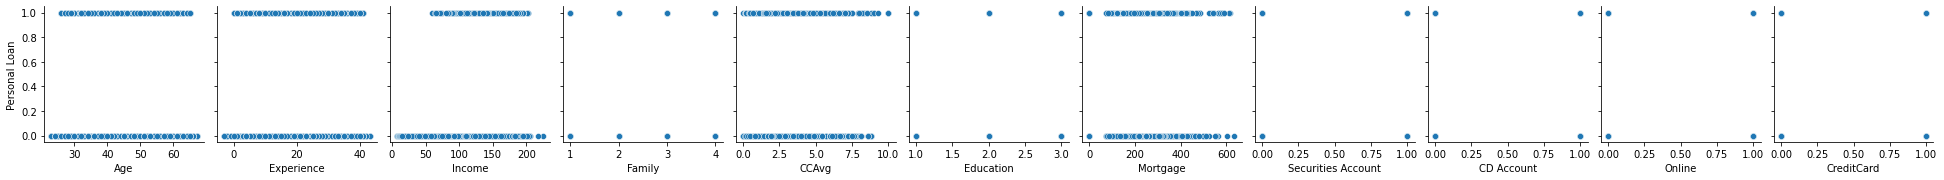

In [12]:
#pairplot
import seaborn as sns
sns.pairplot(df1, x_vars = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'], y_vars = ['Personal Loan'])

#assign & split X, y

In [13]:
#assigning X,y
X = df1.loc[:,df1.columns!='Personal Loan']
y = df1[['Personal Loan']]

In [ ]:
y.shape

(5000, 1)

In [14]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#scaling using Stand.Scaler


In [15]:
#scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#SVM


In [16]:
#imports
from sklearn.svm import SVC

In [17]:
#model training
model = SVC(kernel='linear', C=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, kernel='linear')

In [18]:
#train score
model.score(X_train, y_train)

0.9537142857142857

In [19]:
#test score
model.score(X_test, y_test)

0.9526666666666667

In [20]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 1, 1])

In [21]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

#confusion matrix

In [22]:
expected = y_train
predicted = model.predict(X_train)

In [23]:
#confusion matrix
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3167
           1       0.88      0.59      0.71       333

    accuracy                           0.95      3500
   macro avg       0.92      0.79      0.84      3500
weighted avg       0.95      0.95      0.95      3500

[[3140   27]
 [ 135  198]]


#SVM Plot

In [24]:
#imports
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def SVMClassifier(kernel, cc, gamma):
  svc = SVC(kernel=kernel, C=cc, gamma=gamma)
  svc.fit(X_train[:, :2], y_train)
  h=0.02
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 0].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  plt.scatter(X_train[:, 0], X_train[:, 1])
  plt.xlabel('Age')
  plt.ylabel('Experience')
  plt.xlim(xx.min(), xx.max())
  plt.show()

  print('Training set accuracy %.2f' % svc.score(X_train[:, :2], y_train))
  print('Test set accuracy %.2f' % svc.score(X_test[:, :2], y_test))


In [26]:
from ipywidgets import interact
i = interact(SVMClassifier, kernel=({'linear', 'rbf'}), cc=(1, 100), gamma=(1, 100))

interactive(children=(Dropdown(description='kernel', options=('rbf', 'linear'), value='rbf'), IntSlider(value=…

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])